In [316]:
import pandas as pd

# na_values Turns values into NaN
data = pd.read_csv('../Datasets/CSCS_data_anon.csv', 
                   na_values=["9999", "", " ", "Presented but no response", "NA"],
                   low_memory=False)

cols = pd.read_csv('../Datasets/var_names.csv')

empty = (data.isna().sum()==data.shape[0])
data = data[empty.index[~empty]] # keep non empty columns only

In [317]:
df_happinessScale_numFriends = data[['WELLNESS_subjective_happiness_scale_happy', 'CONNECTION_social_num_close_friends', 'DATASET']].copy()

In [318]:
df_happinessScale_numFriends.WELLNESS_subjective_happiness_scale_happy.unique()

array([nan, '7 - A very happy person', '1 - Not a happy person', '5', '6',
       '2', '4', '3'], dtype=object)

In [319]:
df_happinessScale_numFriends.CONNECTION_social_num_close_friends.unique()

array([ nan,   5.,   6.,   7.,   2.,   0.,   4.,   3.,  18.,   1.,  10.,
        12.,   8.,  17.,  11.,  20.,  14.,   9.,  16.,  15.,  25.,  13.,
        30.,  40., 150.,  60.,  24.,  19.,  23.,  27.,  50.,  22.,  35.,
       100.,  21., 106.,  33.])

In [320]:
df.shape

(787, 3)

In [321]:
df_happinessScale_numFriends.isna().sum()

WELLNESS_subjective_happiness_scale_happy    7792
CONNECTION_social_num_close_friends          6048
DATASET                                         0
dtype: int64

In [322]:
df_happinessScale_numFriends.dropna(inplace=True)

In [323]:
df_happinessScale_numFriends.isna().sum()

WELLNESS_subjective_happiness_scale_happy    0
CONNECTION_social_num_close_friends          0
DATASET                                      0
dtype: int64

In [324]:
df_happinessScale_numFriends.shape

(800, 3)

In [325]:
df_happinessScale_numFriends.DATASET.value_counts()

DATASET
2022 Cohort    450
2023 Cohort    350
Name: count, dtype: int64

In [326]:
df_happinessScale_numFriends.dtypes

WELLNESS_subjective_happiness_scale_happy     object
CONNECTION_social_num_close_friends          float64
DATASET                                       object
dtype: object

In [327]:
# Change the happiness scale to an int.
df_happinessScale_numFriends['WELLNESS_subjective_happiness_scale_happy'] = df_happinessScale_numFriends['WELLNESS_subjective_happiness_scale_happy'].astype(str).str.extract(r'(\d+)')[0].astype(int)

In [328]:
df_happinessScale_numFriends.describe()

,WELLNESS_subjective_happiness_scale_happy,CONNECTION_social_num_close_friends
count,800.000000,800.000000
mean,4.783750,4.475000
std,1.439471,3.587543
min,1.000000,0.000000
25%,4.000000,2.000000
50%,5.000000,4.000000
75%,6.000000,5.000000
max,7.000000,20.000000


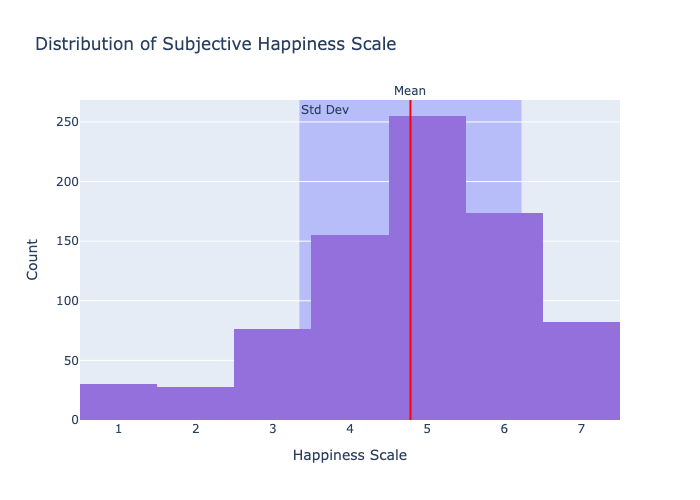

In [341]:
import plotly.express as px
import pandas as pd
import numpy as np

# Assuming df_happinessScale_numFriends is your DataFrame
# Filter and ensure data is within the correct range
df = df_happinessScale_numFriends[df_happinessScale_numFriends['WELLNESS_subjective_happiness_scale_happy'].isin(range(1, 8))]

# Calculate mean and standard deviation
mean_value = df['WELLNESS_subjective_happiness_scale_happy'].mean()
std_dev = df['WELLNESS_subjective_happiness_scale_happy'].std()

# Create the histogram
fig = px.histogram(
    df,
    x='WELLNESS_subjective_happiness_scale_happy',
    title='Distribution of Subjective Happiness Scale',
    labels={'WELLNESS_subjective_happiness_scale_happy': 'Happiness Scale'},
    color_discrete_sequence=['mediumpurple'],
    category_orders={'WELLNESS_subjective_happiness_scale_happy': [1, 2, 3, 4, 5, 6, 7]},  # Ensure custom order
    barnorm='',  # Ensures it is treated as a count histogram, not normalized
    nbins=7  # Specifies the number of bins directly
)

# Customize layout to have no gaps between bins
fig.update_layout(
    xaxis_title='Happiness Scale',
    yaxis_title='Count',
    bargap=0.0  # Set bargap to 0 for no gaps between bars
)

# Add a vertical line for the mean
fig.add_vline(x=mean_value, line_color="red", annotation_text="Mean", annotation_position="top")

# Add a shaded rectangle for the standard deviation
fig.add_vrect(
    x0=mean_value - std_dev, x1=mean_value + std_dev,
    fillcolor="blue", opacity=0.2,
    layer="below", line_width=0,
    annotation_text="Std Dev", annotation_position="top left"
)

# Show the plot
fig.show(renderer='png')


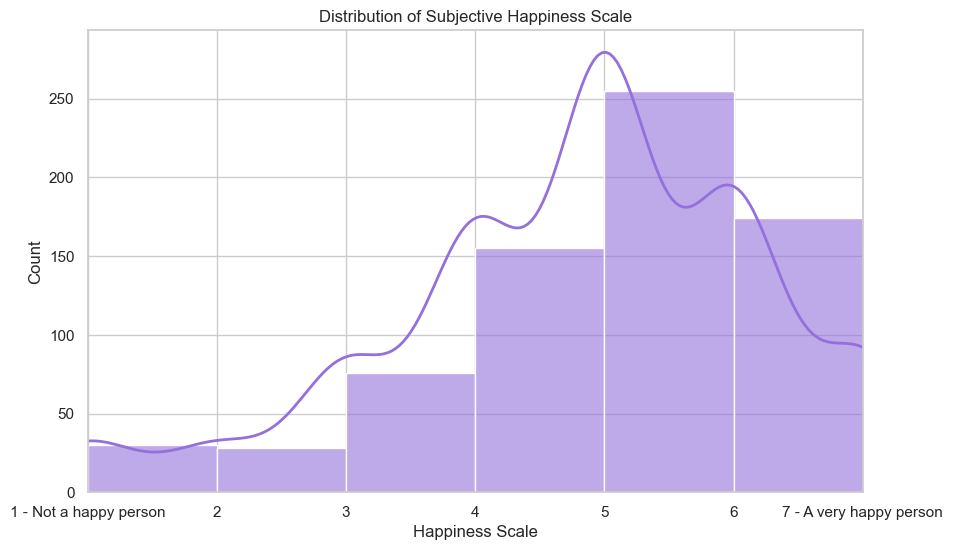

In [330]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_happinessScale_numFriends is your DataFrame
# Make sure the column contains only numeric data [1-7] for accurate plotting

# Filter the DataFrame to exclude non-numeric or out-of-scale values
df = df_happinessScale_numFriends[df_happinessScale_numFriends['WELLNESS_subjective_happiness_scale_happy'].isin(range(1, 8))]

# Create the figure and axes
plt.figure(figsize=(10, 6))

# Create a histogram and KDE plot
sns.histplot(df['WELLNESS_subjective_happiness_scale_happy'], kde=True,
             bins=range(1, 9),  # Adjust the bins to cover from 1 to 7
             color="mediumpurple", alpha=0.6, line_kws={'linewidth': 2})

# Adding labels and title
plt.title('Distribution of Subjective Happiness Scale')
plt.xlabel('Happiness Scale')
plt.ylabel('Count')

# Customize x-ticks for clarity
plt.xticks(ticks=range(1, 8), labels=[
    '1 - Not a happy person', '2', '3', '4', '5', '6', '7 - A very happy person'])

# Set x-axis limits to ensure it only shows 1 to 7
plt.xlim(1, 7)

# Show the plot
plt.show()


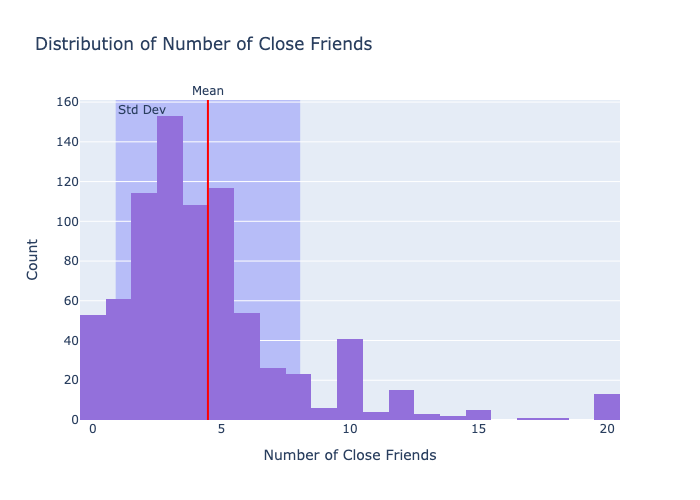

In [337]:
import plotly.express as px

# Assuming df_happinessScale_numFriends is your DataFrame
# Create the histogram
fig = px.histogram(
    df_happinessScale_numFriends,
    x='CONNECTION_social_num_close_friends',
    title='Distribution of Number of Close Friends',
    labels={'CONNECTION_social_num_close_friends': 'Number of close friends'},
    color_discrete_sequence=['mediumpurple']
)

# Customize layout to have no gaps between bins
fig.update_layout(
    xaxis_title='Number of Close Friends',
    yaxis_title='Count',
    bargap=0.0  # Set bargap to 0 for no gaps between bars
)

# Calculate mean and standard deviation
mean_value = df_happinessScale_numFriends['CONNECTION_social_num_close_friends'].mean()
std_dev = df_happinessScale_numFriends['CONNECTION_social_num_close_friends'].std()

# Add a vertical line for the mean
fig.add_vline(x=mean_value, line_color="red", annotation_text="Mean", annotation_position="top")

# Add a shaded rectangle for the standard deviation
fig.add_vrect(
    x0=mean_value - std_dev, x1=mean_value + std_dev,
    fillcolor="blue", opacity=0.2,
    layer="below", line_width=0,
    annotation_text="Std Dev", annotation_position="top left"
)

# Show the plot
fig.show(renderer='png')


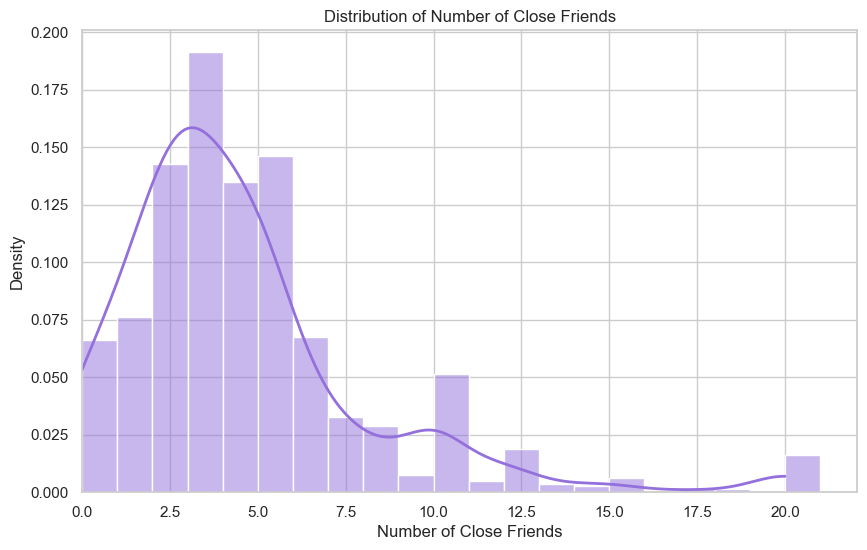

In [333]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_happinessScale_numFriends is your DataFrame and CONNECTION_social_num_close_friends is your column

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create the figure and axes
plt.figure(figsize=(10, 6))

# Plot histogram and KDE
bins = np.arange(0, df_happinessScale_numFriends['CONNECTION_social_num_close_friends'].max() + 2)  # Each bin goes from n to n+1

sns.histplot(data=df_happinessScale_numFriends, x='CONNECTION_social_num_close_friends', kde=True,
             color="mediumpurple", bins=bins, stat='density', line_kws={'linewidth': 2})

# Adding labels and title
plt.title('Distribution of Number of Close Friends')
plt.xlabel('Number of Close Friends')
plt.ylabel('Density')

# Set the x-axis to start at 0
plt.xlim(left=0)

# Show the plot
plt.show()


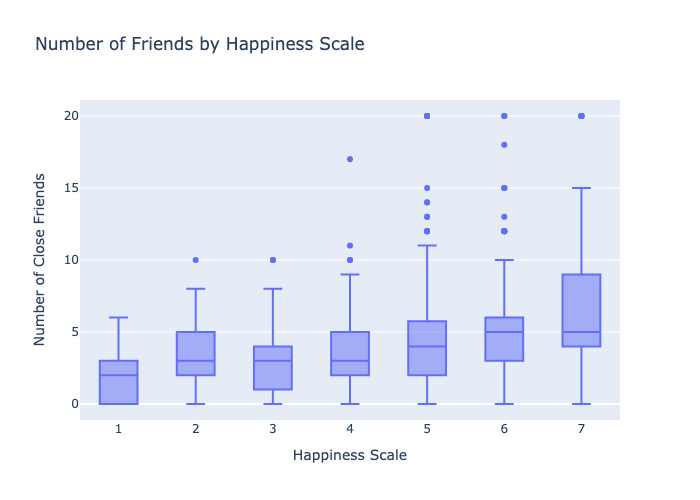

In [339]:
import plotly.express as px

# Assuming df_happinessScale_numFriends has 'WELLNESS_subjective_happiness_scale_happy' for happiness levels
# and 'CONNECTION_social_num_close_friends' for the number of friends

# Create the box plot
fig = px.box(df_happinessScale_numFriends,
             x='WELLNESS_subjective_happiness_scale_happy',
             y='CONNECTION_social_num_close_friends',
             title='Number of Friends by Happiness Scale',
             labels={'WELLNESS_subjective_happiness_scale_happy': 'Happiness Scale', 'CONNECTION_social_num_close_friends': 'Number of Close Friends'},
             category_orders={'WELLNESS_subjective_happiness_scale_happy': [1, 2, 3, 4, 5, 6, 7]})  # Order the x-axis based on the scale

# Customize layout
fig.update_layout(
    xaxis_title='Happiness Scale',
    yaxis_title='Number of Close Friends',
    xaxis_type='category'  # Ensure the x-axis is treated as categorical
)

# Show the plot
fig.show(renderer='png')


                                        OLS Regression Results                                       
Dep. Variable:     WELLNESS_subjective_happiness_scale_happy   R-squared:                       0.097
Model:                                                   OLS   Adj. R-squared:                  0.096
Method:                                        Least Squares   F-statistic:                     85.44
Date:                                       Thu, 21 Nov 2024   Prob (F-statistic):           2.13e-19
Time:                                               22:51:06   Log-Likelihood:                -1385.4
No. Observations:                                        800   AIC:                             2775.
Df Residuals:                                            798   BIC:                             2784.
Df Model:                                                  1                                         
Covariance Type:                                   nonrobust                      

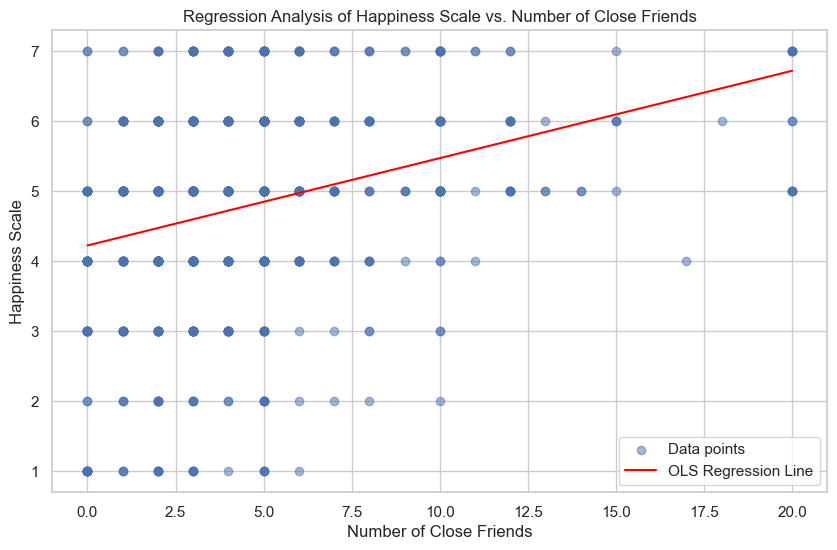

In [358]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

# Assuming df_happinessScale_numFriends is your DataFrame
# Preparing the data
X = df_happinessScale_numFriends['CONNECTION_social_num_close_friends']  # Predictor
y = df_happinessScale_numFriends['WELLNESS_subjective_happiness_scale_happy']  # Response

# Adding a constant to the predictor variable, necessary for statsmodels' OLS model
X = sm.add_constant(X)

# Fit an OLS model
model = sm.OLS(y, X).fit()

# Plotting the data points
plt.figure(figsize=(10, 6))
plt.scatter(X['CONNECTION_social_num_close_friends'], y, alpha=0.5, label='Data points')

# Generating values for the regression line
x_pred = np.linspace(X['CONNECTION_social_num_close_friends'].min(), X['CONNECTION_social_num_close_friends'].max(), 50)
x_pred2 = sm.add_constant(x_pred)  # Need to add a constant to these as well

# Predicting y values for our line
y_pred = model.predict(x_pred2)

# Plotting the regression line
plt.plot(x_pred, y_pred, color='red', label='OLS Regression Line')

# Adding labels and title
plt.title('Regression Analysis of Happiness Scale vs. Number of Close Friends')
plt.xlabel('Number of Close Friends')
plt.ylabel('Happiness Scale')
plt.legend()

print(model.summary())

# Show the plot
plt.show()


                                     OLS Regression Results                                    
Dep. Variable:     CONNECTION_social_num_close_friends   R-squared:                       0.097
Model:                                             OLS   Adj. R-squared:                  0.096
Method:                                  Least Squares   F-statistic:                     85.44
Date:                                 Thu, 21 Nov 2024   Prob (F-statistic):           2.13e-19
Time:                                         22:50:43   Log-Likelihood:                -2115.9
No. Observations:                                  800   AIC:                             4236.
Df Residuals:                                      798   BIC:                             4245.
Df Model:                                            1                                         
Covariance Type:                             nonrobust                                         
                                        

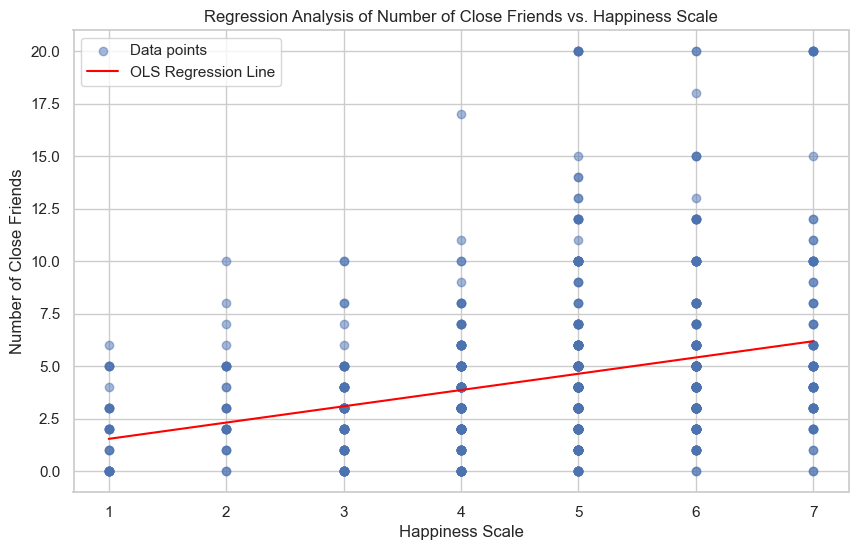

In [354]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

# Assuming df_happinessScale_numFriends is your DataFrame
# Preparing the data
X = df_happinessScale_numFriends['WELLNESS_subjective_happiness_scale_happy']  # Now the predictor
y = df_happinessScale_numFriends['CONNECTION_social_num_close_friends']  # Now the response

# Adding a constant to the predictor variable, necessary for statsmodels' OLS model
X = sm.add_constant(X)

# Fit an OLS model
model = sm.OLS(y, X).fit()

# Plotting the data points
plt.figure(figsize=(10, 6))
plt.scatter(X['WELLNESS_subjective_happiness_scale_happy'], y, alpha=0.5, label='Data points')

# Generating values for the regression line
x_pred = np.linspace(X['WELLNESS_subjective_happiness_scale_happy'].min(), X['WELLNESS_subjective_happiness_scale_happy'].max(), 50)
x_pred2 = sm.add_constant(x_pred)  # Need to add a constant to these as well

# Predicting y values for our line
y_pred = model.predict(x_pred2)

# Plotting the regression line
plt.plot(x_pred, y_pred, color='red', label='OLS Regression Line')

# Adding labels and title
plt.title('Regression Analysis of Number of Close Friends vs. Happiness Scale')
plt.xlabel('Happiness Scale')
plt.ylabel('Number of Close Friends')
plt.legend()

print(model.summary())


# Show the plot
plt.show()



We can reject the null hypothesis that: There is no association between the number of close friends and happiness levels. Therefore there seems to be a correlation between the number of friends someone has and their subjective happiness scale. 

A 0.097 R^2 value suggests that there are other variables or factors that affect happiness. We can use multi-linear regression to try and lower the R-squared value and then try to predict peoples levels of happiness based on other variables. 